# Reinforcement Learning
Matthew Bowker and Braydon Johnson


# **Introduction**:

Reinforcement learning is a type of machine learning, where an agent is given positive or negative reinforcement based on the decisions it makes. You can imagine this being like training a dog. If they do something good you reward them with a treat, if they do something wrong they get nothing.

Machine Learning is a scietific discipline that is used for the developement of algorithms that allows computers to learn based on data.

# Some key features of Reinforcement Learning:
* Agent: The learner or decision-maker that interacts with the environment.

* Environment: The external system with which the agent interacts and learns from. It is the context in which the agent operates.

* State: A representation of the current situation or configuration of the environment.

* Action: The set of possible moves or decisions that the agent can make in a given state.

* Reward: A numerical value that the agent receives as feedback from the environment after taking a particular action in a specific state. The reward signal is a crucial component as it guides the learning process.

* Policy: A strategy or mapping from states to actions that the agent uses to make decisions. The policy can be deterministic or stochastic.

* Value Function: A function that estimates the expected cumulative future rewards for a given state or state-action pair. It helps the agent evaluate the desirability of different states or actions.

* Markov Decision Process (MDP): Reinforcement learning problems are often formulated as MDPs, which consist of a set of states, a set of actions, a transition function that describes how the environment changes from one state to another, and a reward function.

* Learning Algorithm: The method or algorithm used by the agent to update its policy or value function based on the feedback received from the environment.

* Episode: A sequence of interactions between the agent and the environment, usually starting from an initial state and continuing until a terminal state is reached.

* Function Approximation: RL algorithms often use function approximation methods, such as neural networks, to represent policies or value functions.




# How does reinforcemnet learning work?

* an agent observes the current state of the environment
* The agent then selects the next action from the action space of the environment, this action is based on what would be best in the current state
* The environment then updates based on the action
* The agent then revieces a reward based on the new state of the environment



Simplistic example:






* Step 1:
  * State: In state 10. Choose move A or B.
  * Agent: Move B (Good Move)
  * State: Reward 2 points
* Step 2:
  * State: In state 10. Choose move A or B.
  * Agent: Move A (Bad Move)
  * State: Reward -5 points

# **Beginner Implementation**:

To begin with reinforcement learning there are a few things that need to be installed and setup.

In [ ]:
!pip install tensorflow==2.8.0
!pip install gym
!pip install keras==2.9.0
!pip install keras-rl2==1.0.5
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet
!apt-get install x11-utils -y
!pip install pyglet
!pip install ale-py
!pip install stable_baselines
!pip install tensorboard==2.9.0

  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.0
    Uninstalling tensorboard-2.9.0:
      Successfully uninstalled tensorboard-2.9.0
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.9.0 which is incompatible.
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
Reading package lists... Done
Building dependency tree... Done
Reading state information

In [ ]:
import gym
import random
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300)) # initialize the display
display.start()
import matplotlib.pyplot as plt
%matplotlib inline


First we can look at an included package, from OpenAI for Python. This package that we will be using is called Gym.

In [ ]:
# To create an environment just pass the name of the environement to the function gym.make()
name = "CartPole-v0"
environment = gym.make(name)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns 

An agent in reinforcement learning sees an observation as the environment's state. There are two types of states for an agent: Partially observable and Fully Observable. There are also two types of actions in Reinforcement Learning. These actions are continuous or discrete. A discrete action being given by a finite value, while continuous has an infinite number of possible values.

In [ ]:
# Use the reset function to reset the environment
state_0 = environment.reset()
'''
 represented by four numbers:
    posn of the cart
    velocity of the cart
    angular posn of the pole
    angular velocity of the pole
'''
observation_space = environment.observation_space.shape
action_space = environment.action_space
num_actions = environment.action_space.n
print(state_0)
print(observation_space) # one-dimensional space with four elements
print(action_space) # the agent can choose between two distinct actions at each time step
print(num_actions)  # represents the number of possible actions in the discrete action space.

[-0.04524121 -0.03054837  0.00473611  0.01018488]
(4,)
Discrete(2)
2


The output that I got when I ran it, each time the code cell is ran the intitial state will vary slightly but the remaining stays the same.
* [-0.01307736 -0.04108622 -0.0398733  -0.01529541]
* (4,)
* Discrete(2)
* 2



Observe the output above. What do each of these outputs mean?




Based on the output above:
  * The first line of output represents the four values of the state
    * -0.01307736 is the initial posn of the cart
    * -0.041108622 is the initial velocity of the cart
    * -0.0398733 is the initial angular posn of the pole
    * -0.01529541 is the initial angular velocity of the pole
  * (4,) represents the observation space
  * Discrete(2) represents the environment action space
  * 2 represents the number of actions in the environment

In [ ]:
intitial_obs = environment.reset()
action = environment.action_space.sample()
next_obs, reward, over, info = environment.step(action)
print(intitial_obs) # the initial observation of the environment
print(action) # the sampled action
print(next_obs) # the observation of the environment after taking the action
print(reward) # the reward obtained from taking the action
print(over) # whether the episode is over

[-0.0048959   0.01541275 -0.01991401  0.01216654]
0
[-0.00458765 -0.17941803 -0.01967068  0.29850042]
1.0
False


Random render is a method that takes in a frequency and takes in the number of episodes you want to render. In this case I have the frequency set at two and I only want to display one episode. This method uses ipythondisplay to display the
environment. In this case we want to make the action be a random choice from the number of actions in the environment.

In [ ]:
def random_render(render_frequency=2, episodes=1):
    for ep in range(1, episodes+1):
        s_0 = environment.reset()
        over = False
        points = 0
        frame_count = 0
        prev_screen = environment.render(mode='rgb_array')
        plt.imshow(prev_screen)
        while not over:
            action = random.choice([0, 1])
            s_n, reward, over, info = environment.step(action)
            points += reward

            # Render every 10 frames
            frame_count += 1
            if frame_count % render_frequency == 0:
                screen = environment.render(mode='rgb_array')
                plt.imshow(screen)
                ipythondisplay.clear_output(wait=True)
                ipythondisplay.display(plt.gcf())

        ipythondisplay.clear_output(wait=True)
        print(f"Episode: {ep} Points: {points}")

Episode: 1 Points: 11.0


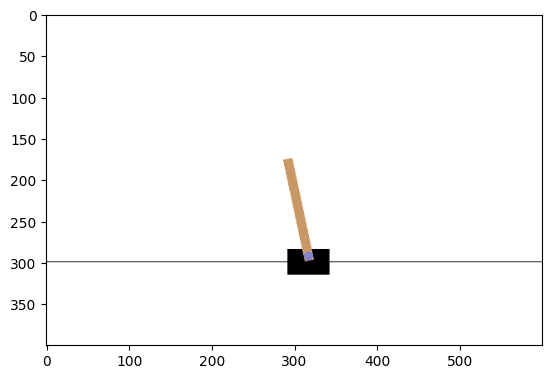

In [ ]:
random_render()

For each step the pole is upright, the agent receives a point. The max points is 200.

Required Imports to train the agent using the off the shelf methods

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory


Model Builder is a method that is used to create a neural network for the training of the agent.




In [ ]:
def model_builder(obs, actions):
  model= Sequential()
  model.add(Flatten(input_shape=(1,obs[0])))
  model.add(Dense(24, activation='relu')) # creates a dense layer of 24 neurons use the Relu function
  model.add(Dense(24, activation='relu')) # creates another dense layer of 24 neurons use the Relu function
  model.add(Dense(units=actions, activation='relu')) # add the last layer of the network based on the number of actions in the environment
  return model

model  = model_builder(observation_space, action_space.n)
model.summary()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 24)                120       
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
 dense_2 (Dense)             (None, 2)                 50        
                                                                 
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________


Policy Based Reinforcement Learning:

* State of the environment starts out at a random state
* Actions are random and the agens learns based on the rewards given from the actions
* The agents evaluates each action after they have taken them.
* After several iterations, the agent begins to learn and remember what actions produced good outcomes.
* Eventually the policy can be considered an optimal policy, which means that it yields good rewards and leads the agent to the goal.





In [ ]:
def agent_builder(model, actions):
  pol = BoltzmannQPolicy() # off the shelf policy for exploration
  mem = SequentialMemory(limit=50000, window_length=1) # initializes the memory buffer that stores the most recent actions
  dqn = DQNAgent(model=model, memory=mem, policy=pol, nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2) # makes the agent based on model, memory, and policy
  return dqn

In [ ]:
#training our RL Agent
dqn = agent_builder(model, num_actions)# initializes the DQN agent
dqn.compile(Adam(learning_rate=1e-3), metrics=['mae']) # compiles the agent and specifies the learning rate to 1e-3 and sets
# monitors the training with mean absolute error
dqn.fit(environment, nb_steps=20000, visualize=False, verbose=1) #uses the off the shelf training method to train the agent

Training for 20000 steps ...
Interval 1 (0 steps performed)
    1/10000 [..............................] - ETA: 11:03 - reward: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.10/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)


   19/10000 [..............................] - ETA: 12:21 - reward: 1.0000

/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 11 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 12 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 13 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 14 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 15 + 1) instead
  batch

   28/10000 [..............................] - ETA: 9:41 - reward: 1.0000 

/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 21 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 22 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 23 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 24 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 25 + 1) instead
  batch

   36/10000 [..............................] - ETA: 8:29 - reward: 1.0000

/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 29 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 30 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 31 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)


10000/10000 [==============================] - 98s 10ms/step - reward: 1.0000
1048 episodes - episode_reward: 9.535 [8.000, 53.000] - loss: 1.109 - mae: 0.331 - mean_q: 4.997

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 87s 9ms/step - reward: 1.0000
done, took 185.335 seconds


Using ipythondisplay again we can now render our environment but with a trained agent.

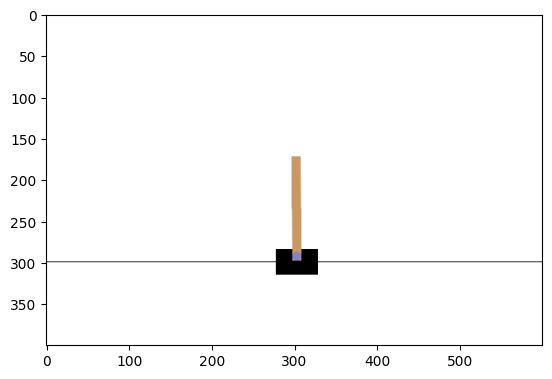

Cumulative Reward (Score): 10.0


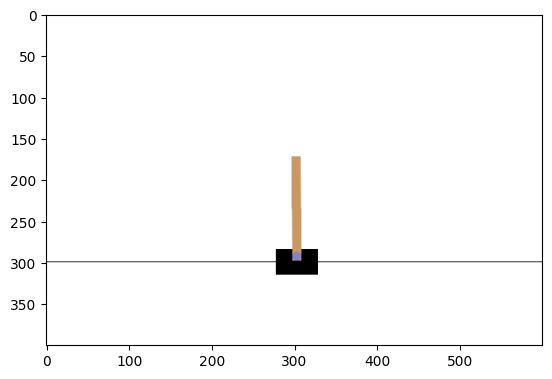

In [ ]:
render_frequency = 10  # Render every 10 frames
cumulative_reward = 0
for episode in range(1):
    state = environment.reset()
    done = False
    frame_count = 0

    while not done:
        # Uses the built in forward method to choose the next state
        action = dqn.forward(state)
        # passes the input through the neural network and produces the output

        # Take the chosen action and observe the next state and reward
        next_state, reward, done, _ = environment.step(action)

        # Accumulate the cumulative reward
        cumulative_reward += reward

        # Custome rendering code that only displays the screen every render_frequency
        if frame_count % render_frequency == 0:
            screen = environment.render(mode='rgb_array')
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())

        # Move to the next state
        state = next_state
        frame_count += 1

# Print the cumulative reward (score) received during the episode
print("Cumulative Reward (Score):", cumulative_reward)

# Close the virtual display when done
#display.stop()

The output this time for our score is 200, which is the max score for this environment. After being trained, the agent can effectively stabilize the pole by moving the cart left or right.

# Intermediate Implementation

In [ ]:
!apt-get update
!apt-get install -y python3-dev swig
!pip install gym[box2d]
#dependency that allows the lunar lander environment


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
swig is already the newest version (4.0.2-1ubuntu1).
python3-dev is already the newest version (3.10.6-1~22.04).
0 upgraded, 0 newly insta

The objective of this environment is to have the spaceship land upright and in between the flags.

In [ ]:
environment2 = gym.make('LunarLander-v2')


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Observe the environment below

In [ ]:
# Use the reset function to reset the environment
state_0 = environment2.reset()

observation_space2 = environment2.observation_space.shape
action_space2 = environment2.action_space
num_actions2 = environment2.action_space.n
print(state_0)
print(observation_space2)
print(action_space2)
print(num_actions2)

[-0.0054637   1.404274   -0.5534233  -0.2953924   0.00633779  0.12535848
  0.          0.        ]
(8,)
Discrete(4)
4


Model_builder2 is the same nueral network as the first, but has 8 nodes in the output instead of 4

In [ ]:
def model_builder2(obs, actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1,8)))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model


Using model2.summary() allows us to see the neural networl and its layers

In [ ]:
model2 = model_builder2(observation_space2, num_actions2)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 24)                216       
                                                                 
 dense_4 (Dense)             (None, 24)                600       
                                                                 
 dense_5 (Dense)             (None, 4)                 100       
                                                                 
Total params: 916
Trainable params: 916
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def random_renderv2(render_frequency=5, episodes=1):
    for ep in range(1, episodes+1):
        s_0 = environment2.reset()
        over = False
        points = 0
        frame_count = 0
        prev_screen = environment2.render(mode='rgb_array')
        plt.imshow(prev_screen)
        while not over:
            action = random.choice([0, 3])
            s_n, reward, over, info = environment2.step(action)
            points += reward
            frame_count += 1
            if frame_count % render_frequency == 0:
                screen = environment2.render(mode='rgb_array')
                plt.imshow(screen)
                ipythondisplay.clear_output(wait=True)
                ipythondisplay.display(plt.gcf())

        ipythondisplay.clear_output(wait=True)
        print(f"Episode: {ep} Points: {points}")

When running random_renderv2() it is obvious that choosing a random action does not give the spaceship the best chance of landing. Unlike the first environment there is not really a max score, the goal is to achieve a positive score.

Episode: 1 Points: -394.2813245168048


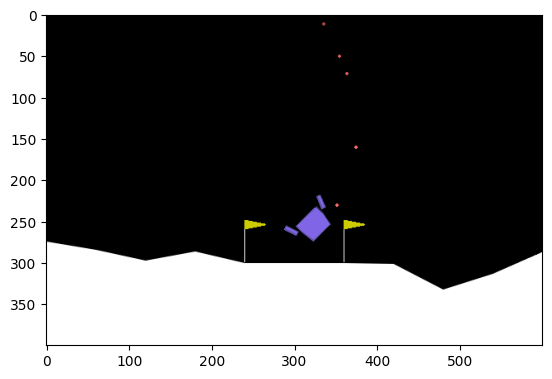

In [ ]:
random_renderv2()

Custom Training method that takes in 8 parameters:


* agent - the specified agent when calling the method
* env - the specified environment when calling the method
* total_steps - total number of steps the agent will take in the environment
* batch_size - the number of experiences sampled from the replay at each update to train the agent
* update_targer_every - frequency at which the target Q-network is updated with the weights of the main Q-network
* visualize - determines if you will see the environment during training.(Which has not worked for me in Google Colab)
* verbose - if greater than 0 prints information about the training process
* replay_buffer_size - maximum size of the replay buffer



In [ ]:
def custom_fit(agent, env, total_steps, batch_size=32, update_target_every=1000, visualize=False, verbose=1, replay_buffer_size=50000):
    state = env.reset()
    total_reward = 0
    step = 0

    replay_buffer = []  # Initialize an empty replay buffer to remeber the previous actions taken

    while step < total_steps:
        # Choose action based on DQN agent's forward method
        action = agent.forward(state)

        # Take action in the environment
        next_state, reward, done, _ = env.step(action)

        # Store experience in the replay buffer
        replay_buffer.append((state, action, reward, next_state, done))

        # Perform a backward pass to update the Q-network
        # Sample a random batch from the replay buffer and update the agent
        if len(replay_buffer) >= batch_size:
          indices = np.random.choice(len(replay_buffer), batch_size, replace=False)
          batch = [replay_buffer[i] for i in indices]
          states, actions, rewards, next_states, dones = zip(*batch)
          agent.backward(np.array(rewards), terminal=np.array(dones))

        # Update state and total reward
        state = next_state
        total_reward += reward
        step += 1

        # Update target network every N steps
        if step % update_target_every == 0:
            agent.target_model.set_weights(agent.model.get_weights())

        if done:
            # Reset the environment when an episode is done
            state = env.reset()
            if verbose > 0:
                print(f"Step {step}, Total Reward: {total_reward}")
            total_reward = 0

    env.close()


Trained_Render method that takes three parameter:
* env - specific environment when the method is called
* render_frequency - determines how often the display is updated with the new state
* agent - specific agent when the method is called

In [ ]:
def trained_render(env, render_frequency, agent):
    cumulative_reward = 0

    for episode in range(1):
        state = env.reset()
        done = False
        frame_count = 0

        while not done:
            # Your action selection logic
            action = agent.forward(state)

            # Take the chosen action and observe the next state and reward
            next_state, reward, done, _ = env.step(action)

            # Accumulate the cumulative reward
            cumulative_reward += reward

            if frame_count % render_frequency == 0:
                screen = env.render(mode='rgb_array')
                plt.imshow(screen)
                ipythondisplay.clear_output(wait=True)
                ipythondisplay.display(plt.gcf())

            # Move to the next state
            state = next_state
            frame_count += 1

    # Print the cumulative reward after the episode is done
    print("Cumulative Reward:", cumulative_reward)


In [ ]:
model2 = model_builder2(observation_space2,num_actions2)
dqn2 = agent_builder(model2,num_actions2)
dqn2.compile(Adam(learning_rate=1e-3), metrics=['mae'])
# compiles the agent and specifies the learning rate to 1e-3
# sometimes you have to adjust the learning rate to get better scores when training
# also set the metrics based on mean absolute error
custom_fit(dqn2, environment2, total_steps=1000, visualize=False, verbose=1)

Step 115, Total Reward: -754.0327799805069
Step 464, Total Reward: -3730.3416870189103
Step 633, Total Reward: -902.0470827009183
Step 793, Total Reward: -1042.862271209408
Step 866, Total Reward: -574.1004823970762
Step 957, Total Reward: -662.7638602403373


Using my custom training method, I have seen some positive scores but I mainly achieve scores close to zero. But other times it seems to wander off the edge of the screen giving me huge negative scores.

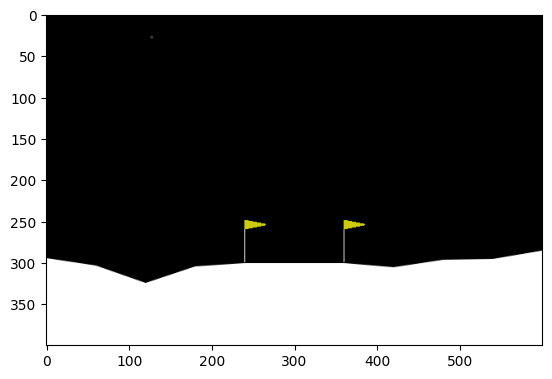

Cumulative Reward: -1053.8807837341706


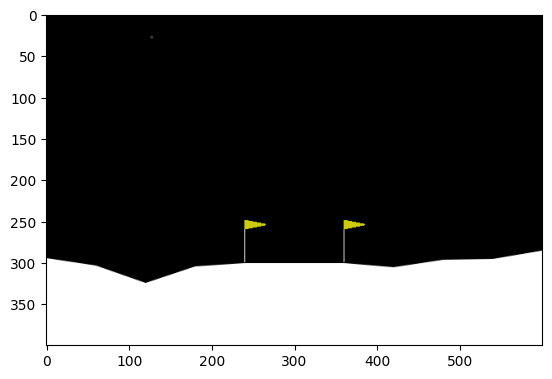

In [ ]:
trained_render(environment2, 5, dqn2)

Off the Shelf Training method for lunar lander.

In [ ]:
dqn3 = agent_builder(model2,num_actions2)
dqn3.compile(Adam(learning_rate=1e-3), metrics=['mae'])
dqn3.fit(environment2, nb_steps=20000, visualize=False, verbose=1)
## NOTE: nb_steps is the amount steps the agent will take during training

Training for 20000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 86s 9ms/step - reward: -0.5829
65 episodes - episode_reward: -90.984 [-638.792, 225.950] - loss: 24.707 - mae: 13.004 - mean_q: 8.159

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 96s 10ms/step - reward: -0.1310
done, took 181.529 seconds


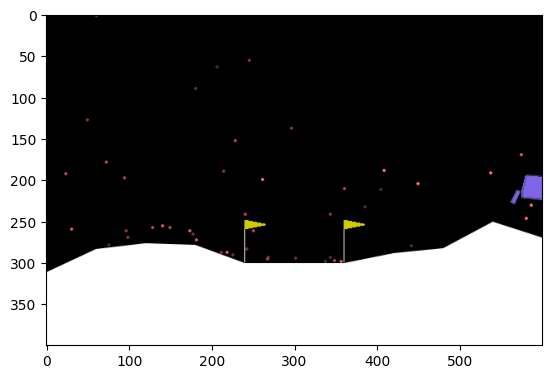

Cumulative Reward: -110.69108041225378


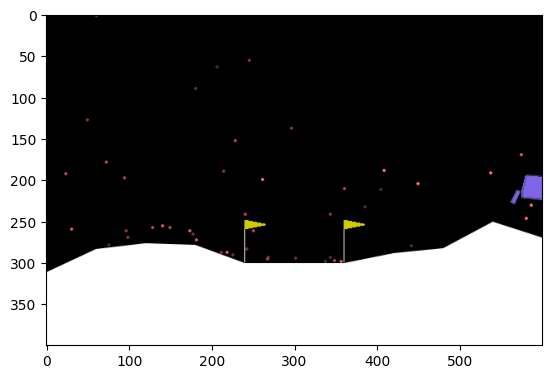

In [ ]:
trained_render(environment2,20,dqn3)

## True Lunar Lander implementation

Before training

<img style="display: block;-webkit-user-select: none;margin: auto;background-color: hsl(0, 0%, 90%);" src="https://raw.githubusercontent.com/anh-nn01/Lunar-Lander-Double-Deep-Q-Networks/master/Misc/Initial.gif">

In [ ]:
import numpy as np

import gym

import tensorflow.compat.v1 as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Embedding, Reshape
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import random
from collections import deque
import time
tf.disable_v2_behavior() # testing on tensorflow 1

class Agent:
    def __init__(self, env, optimizer, batch_size):
        # general info
        self.state_size = env.observation_space.shape[0] # number of factors in the state; e.g: velocity, position, etc
        self.action_size = env.action_space.n
        self.optimizer = optimizer
        self.batch_size = batch_size

        # allow large replay exp space
        self.replay_exp = deque(maxlen=1000000)

        self.gamma = 0.99
        self.epsilon = 1.0 # initialize with high exploration, which will decay later

        # Build Policy Network
        self.brain_policy = Sequential()
        self.brain_policy.add(Dense(128, input_dim = self.state_size, activation = "relu"))
        self.brain_policy.add(Dense(128 , activation = "relu"))
        self.brain_policy.add(Dense(self.action_size, activation = "linear"))
        self.brain_policy.compile(loss = "mse", optimizer = self.optimizer)


        # Build Target Network
        self.brain_target = Sequential()
        self.brain_target.add(Dense(128, input_dim = self.state_size, activation = "relu"))
        self.brain_target.add(Dense(128 , activation = "relu"))
        self.brain_target.add(Dense(self.action_size, activation = "linear"))
        self.brain_target.compile(loss = "mse", optimizer = self.optimizer)


        self.update_brain_target()

    # add new experience to the replay exp
    def memorize_exp(self, state, action, reward, next_state, done):
        self.replay_exp.append((state, action, reward, next_state, done))

    def update_brain_target(self):
        return self.brain_target.set_weights(self.brain_policy.get_weights())

    def choose_action(self, state):
        if np.random.uniform(0.0, 1.0) < self.epsilon: # exploration
            action = np.random.choice(self.action_size)
        else:
            state = np.reshape(state, [1, state_size])
            qhat = self.brain_policy.predict(state) # output Q(s,a) for all a of current state
            action = np.argmax(qhat[0]) # because the output is m * n, so we need to consider the dimension [0]

        return action

    # update params in NN
    def learn(self):
        # take a mini-batch from replay experience
        cur_batch_size = min(len(self.replay_exp), self.batch_size)
        mini_batch = random.sample(self.replay_exp, cur_batch_size)

        # batch data
        sample_states = np.ndarray(shape = (cur_batch_size, self.state_size)) # replace 128 with cur_batch_size
        sample_actions = np.ndarray(shape = (cur_batch_size, 1))
        sample_rewards = np.ndarray(shape = (cur_batch_size, 1))
        sample_next_states = np.ndarray(shape = (cur_batch_size, self.state_size))
        sample_dones = np.ndarray(shape = (cur_batch_size, 1))

        temp=0
        for exp in mini_batch:
            sample_states[temp] = exp[0]
            sample_actions[temp] = exp[1]
            sample_rewards[temp] = exp[2]
            sample_next_states[temp] = exp[3]
            sample_dones[temp] = exp[4]
            temp += 1


        sample_qhat_next = self.brain_target.predict(sample_next_states)

        # set all Q values terminal states to 0
        sample_qhat_next = sample_qhat_next * (np.ones(shape = sample_dones.shape) - sample_dones)
        # choose max action for each state
        sample_qhat_next = np.max(sample_qhat_next, axis=1)

        sample_qhat = self.brain_policy.predict(sample_states)

        for i in range(cur_batch_size):
            a = sample_actions[i,0]
            sample_qhat[i,int(a)] = sample_rewards[i] + self.gamma * sample_qhat_next[i]

        q_target = sample_qhat

        self.brain_policy.fit(sample_states, q_target, epochs = 1, verbose = 0)

env = gym.make("LunarLander-v2")
optimizer = Adam(learning_rate = 0.0001)

agent = Agent(env, optimizer, batch_size = 64)
state_size = env.observation_space.shape[0]


Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

def train_render(env, render_frequency, agent):

  timestep=0
  rewards = []
  aver_reward = []
  aver = deque(maxlen=100)
  frame_count = 0

  for episode in range(50):
      state = env.reset()
      total_reward = 0
      done = False

      while not done:
          action = agent.choose_action(state)
          next_state, reward, done, info = env.step(action)

          #env.render()

          total_reward += reward

          agent.memorize_exp(state, action, reward, next_state, done)
          agent.learn()

          '''
          if timestep % render_frequency == 0:
              screen = env.render(mode='rgb_array')
              plt.imshow(screen)
              plt.show()
              clear_output(wait=True)
          '''
          state = next_state
          timestep += 1


      aver.append(total_reward)
      aver_reward.append(np.mean(aver))

      rewards.append(total_reward)

      # update model_target after each episode
      agent.update_brain_target()

      agent.epsilon = max(0.1, 0.995 * agent.epsilon) # decaying exploration
      print("Episode ", episode, total_reward)

'''
plt.title("Learning Curve")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot(rewards)

plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot(aver_reward, 'r')
 '''
env.close()

In [ ]:
train_render(env,20,agent)

Episode  0 -272.74049792477933
Episode  1 -330.0630768666334
Episode  2 -145.36302818218257
Episode  3 -103.985345879447
Episode  4 -137.9138960236099
Episode  5 -334.70282086193674
Episode  6 -185.6313946320297
Episode  7 -221.44937088047132
Episode  8 -169.44961828679118
Episode  9 -245.08316099255893
Episode  10 -219.86242430447487
Episode  11 -171.92156864350974
Episode  12 -379.1780510554812
Episode  13 -504.85967236430986
Episode  14 -197.36542024363047
Episode  15 -57.812692923093365
Episode  16 -228.4649927291232
Episode  17 -112.22064097413838
Episode  18 -124.96091923297882
Episode  19 -65.58550466809884
Episode  20 -298.9358910778159
Episode  21 -68.61890043402624
Episode  22 -130.25841264398755
Episode  23 -62.03148519892741
Episode  24 -164.46337930551312
Episode  25 -104.37683159820679
Episode  26 -69.94613048058733
Episode  27 -174.92125912624294
Episode  28 -115.72376805479547
Episode  29 -117.5377883197087
Episode  30 -171.09312234977153
Episode  31 -89.05913883993327


After training

<img alt="NextGen.gif" src="https://github.com/anh-nn01/Lunar-Lander-Double-Deep-Q-Networks/blob/master/Misc/NextGen.gif?raw=true" data-hpc="true" class="Box-sc-g0xbh4-0 kzRgrI">

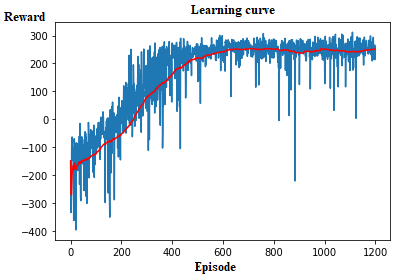

# Below are the links to the videos and websites that helped make this Folder.

* https://machinelearningknowledge.ai/beginners-guide-to-what-is-policy-in-reinforcement-learning/#:~:text=The%20agent%20learns%20the%20good%20policy%20in%20an,these%20actions%20lead%20to%20good%20or%20bad%20rewards.
* https://www.youtube.com/watch?v=cO5g5qLrLSo
* https://www.youtube.com/watch?v=nRHjymV2PX8
* https://colab.research.google.com/github/khipu-ai/practicals-2023/blob/main/notebooks/reinforcement_learning.ipynb
* https://github.com/anh-nn01/Lunar-Lander-Double-Deep-Q-Networks